In [106]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re
from scipy.stats import linregress
import seaborn as sns

In [107]:
# use pandas to read csv into dataframe
file_to_load = os.path.join('..','Resources','pokemon.csv')
pokemon_df = pd.read_csv(file_to_load)
pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [108]:
# check column names
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [109]:
# check for null values, type2 should have many nulls due to the nature of pokemon types
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [110]:
# total of 801 pokemon in this list, as expected
len(pokemon_df)

801

In [111]:
# number of rows with null values in this column makes up 2.5% of all rows, and therefore is worth the time cleaning
100 * len(pokemon_df[pokemon_df['weight_kg'].isna()]) / len(pokemon_df)

2.4968789013732833

In [112]:
# check that pokemon with null values for height and weight are the same pokemon
pokemon_df[pokemon_df['height_m'].isna()]['name'] == pokemon_df[pokemon_df['weight_kg'].isna()]['name']

18     True
19     True
25     True
26     True
27     True
36     True
37     True
49     True
50     True
51     True
52     True
73     True
74     True
75     True
87     True
88     True
102    True
104    True
719    True
744    True
Name: name, dtype: bool

In [113]:
# added all of the weights manually using serebii.net
pokemon_df.loc[18,'height_m'] = 0.3 
pokemon_df.loc[18,'weight_kg'] = 3.5 

In [114]:
# check that cell value changed
pokemon_df.loc[18,'height_m']

0.3

In [115]:
# repeated for all missing values in height and weight columns
pokemon_df.loc[19,'height_m'] = 0.7 
pokemon_df.loc[19,'weight_kg'] = 18.5

pokemon_df.loc[25,'height_m'] = 0.8 
pokemon_df.loc[25,'weight_kg'] = 30.0

pokemon_df.loc[26,'height_m'] = 0.6 
pokemon_df.loc[26,'weight_kg'] = 12.0

pokemon_df.loc[27,'height_m'] = 1.0 
pokemon_df.loc[27,'weight_kg'] = 29.5

pokemon_df.loc[36,'height_m'] = 0.6
pokemon_df.loc[36,'weight_kg'] = 9.9

pokemon_df.loc[37,'height_m'] = 1.1
pokemon_df.loc[37,'weight_kg'] = 19.9

pokemon_df.loc[49,'height_m'] = 0.2 
pokemon_df.loc[49,'weight_kg'] = 0.8

pokemon_df.loc[50,'height_m'] = 0.7
pokemon_df.loc[50,'weight_kg'] = 33.3

pokemon_df.loc[51,'height_m'] = 0.4
pokemon_df.loc[51,'weight_kg'] = 4.2

pokemon_df.loc[52,'height_m'] = 1.0
pokemon_df.loc[52,'weight_kg'] = 32.0

pokemon_df.loc[73,'height_m'] = 0.4
pokemon_df.loc[73,'weight_kg'] = 20.0

pokemon_df.loc[74,'height_m'] = 1.0
pokemon_df.loc[74,'weight_kg'] = 105.0

pokemon_df.loc[75,'height_m'] = 1.4
pokemon_df.loc[75,'weight_kg'] = 300.0

pokemon_df.loc[87,'height_m'] = 0.9
pokemon_df.loc[87,'weight_kg'] = 30.0

pokemon_df.loc[88,'height_m'] = 1.2
pokemon_df.loc[88,'weight_kg'] = 30.0

pokemon_df.loc[102,'height_m'] = 2.0
pokemon_df.loc[102,'weight_kg'] = 120.0

pokemon_df.loc[104,'height_m'] = 1.0
pokemon_df.loc[104,'weight_kg'] = 45.0

pokemon_df.loc[719,'height_m'] = 0.5
pokemon_df.loc[719,'weight_kg'] = 9.0

pokemon_df.loc[744,'height_m'] = 0.9
pokemon_df.loc[744,'weight_kg'] = 25.0

In [116]:
# data is cleaner
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


In [117]:
# add female percentage
pokemon_df['percentage_female'] = 100 - pokemon_df['percentage_male'] 
pokemon_df['percentage_female']

0      11.9
1      11.9
2      11.9
3      11.9
4      11.9
       ... 
796     NaN
797     NaN
798     NaN
799     NaN
800     NaN
Name: percentage_female, Length: 801, dtype: float64

In [118]:
# create non-binary categories for null gender values
pokemon_df['non-binary'] = 0
pokemon_df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0


In [119]:
#replace null values for male and female percentages with 0
pokemon_df.loc[pokemon_df['percentage_male'].isna()] = pokemon_df.loc[pokemon_df['percentage_male'].isna()].replace(np.nan, 0)

In [120]:
# gender values are checked, along with is_legendary since most non-binary should be legendary
pokemon_df[['percentage_male', 'is_legendary' , 'percentage_female', 'non-binary']]

,percentage_male,is_legendary,percentage_female,non-binary
0,88.1,0,11.9,0
1,88.1,0,11.9,0
2,88.1,0,11.9,0
3,88.1,0,11.9,0
4,88.1,0,11.9,0
...,...,...,...,...
796,0.0,1,0.0,0
797,0.0,1,0.0,0
798,0.0,1,0.0,0
799,0.0,1,0.0,0


In [121]:
#check a few rows where there should be at least one legendary, and thus non-binary
pokemon_df.iloc[490:493, 10:]

,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
490,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,90,...,135,90,125,dark,0,50.5,4,1,0.0,0
491,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5,103,...,120,75,127,grass,grass,2.1,4,1,0.0,0
492,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,120,...,120,120,120,normal,0,320.0,4,1,0.0,0


In [122]:
# create pandas series containing all non-binary pokemon
nonbinary = pokemon_df.loc[(pokemon_df['percentage_male'] == 0) & (pokemon_df['percentage_female'] == 0)]['non-binary']

In [123]:
# change non-binary pokemon percentages to 100%
nonbinary = nonbinary.replace(0, 100)
#get index for all non-binary pokemon and make a list out of it
nonbinary_index = nonbinary.index.tolist()

In [124]:
non_binary_pokemon = pokemon_df.iloc[nonbinary_index]
non_binary_names = non_binary_pokemon['name'].tolist()

In [125]:
# assign all non-binary pokemon to a percetange of 100%, leaving all binary pokemon at a default of 0%
pokemon_df['non-binary'].iloc[nonbinary_index] = 100

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
#check column to confirm success
pokemon_df['non-binary']

0        0
1        0
2        0
3        0
4        0
      ... 
796    100
797    100
798    100
799    100
800    100
Name: non-binary, Length: 801, dtype: int64

In [127]:
pokemon_df.iloc[490:500]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
490,['Bad Dreams'],2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,...,135,90,125,dark,0,50.5,4,1,0.0,100
491,"['Natural Cure', 'Serene Grace']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,120,75,127,grass,grass,2.1,4,1,0.0,100
492,['Multitype'],1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,120,120,120,normal,0,320.0,4,1,0.0,100
493,['Victory Star'],1.00,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,...,100,100,100,psychic,fire,4.0,5,1,0.0,100
494,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,45,55,63,grass,NaN,8.1,5,0,11.9,0
495,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,60,75,83,grass,NaN,16.0,5,0,11.9,0
496,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,75,95,113,grass,NaN,63.0,5,0,11.9,0
497,"['Blaze', 'Thick Fat']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,45,45,45,fire,NaN,9.9,5,0,11.9,0
498,"['Blaze', 'Thick Fat']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,70,55,55,fire,fighting,55.5,5,0,11.9,0
499,"['Blaze', 'Reckless']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,100,65,65,fire,fighting,150.0,5,0,11.9,0


In [128]:
# cleaned values in row 773
pokemon_df.iloc[773,23] = '30'
clean_pokemon_df = pokemon_df.copy()
clean_pokemon_df.iloc[773,23]

'30'

In [129]:
# change capture_rate from string to int
clean_pokemon_df=clean_pokemon_df.astype({'capture_rate':int})
clean_pokemon_df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [130]:
# only type2 has null values, which will be changed later to none
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                346
weight_kg              0
generation             0


r value: 0.0453511986460209
p value: 0.1997786859179645


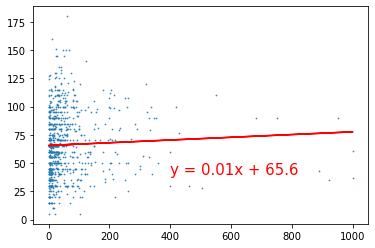

In [131]:
# plot weight vs speed: no relationship apparent
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['weight_kg'].values.tolist(), clean_pokemon_df['speed'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(weight * slope + intercept) for weight in clean_pokemon_df['weight_kg'].values.tolist()]
plt.scatter(clean_pokemon_df['weight_kg'],clean_pokemon_df['speed'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['weight_kg'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (400,40), fontsize=15, color="red")
print(f"r value: {r_value}\np value: {p_value}")
plt.show()

r value: 0.6264207002953233
p_value: 1.6117587628866627e-88


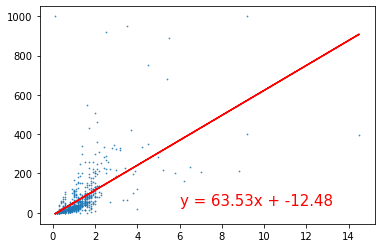

In [132]:
# plot height vs weight: positive linear relationship
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['height_m'].values.tolist(), clean_pokemon_df['weight_kg'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(height * slope + intercept) for height in clean_pokemon_df['height_m'].values.tolist()]
plt.scatter(clean_pokemon_df['height_m'],clean_pokemon_df['weight_kg'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['height_m'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (6,40), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {p_value}")
plt.show()

r value: 0.3681539995495992


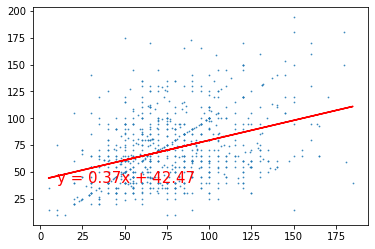

In [133]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['attack'].values.tolist(), clean_pokemon_df['sp_attack'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['attack'].values.tolist()]
plt.scatter(clean_pokemon_df['attack'],clean_pokemon_df['sp_attack'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['attack'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"r value: {r_value}")
plt.show()

r value: 0.4689149139189303


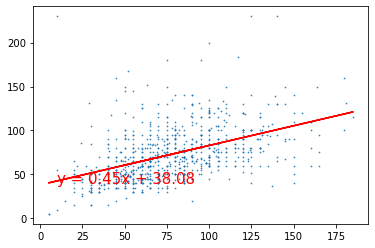

In [134]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['attack'].values.tolist(), clean_pokemon_df['defense'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['attack'].values.tolist()]
plt.scatter(clean_pokemon_df['attack'],clean_pokemon_df['defense'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['attack'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"r value: {r_value}")
plt.show()

r value: 0.5263482757215798


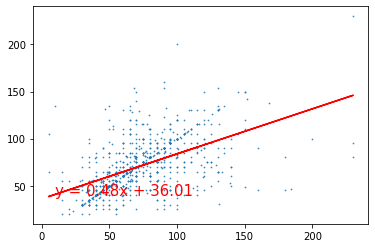

In [135]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['defense'].values.tolist(), clean_pokemon_df['sp_defense'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['defense'].values.tolist()]
plt.scatter(clean_pokemon_df['defense'],clean_pokemon_df['sp_defense'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['defense'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
print(f"r value: {r_value}")
plt.show()

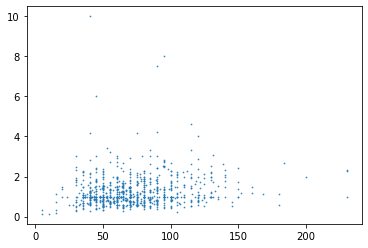

In [136]:
plt.scatter(clean_pokemon_df['defense'],clean_pokemon_df['attack'] / clean_pokemon_df['sp_attack'] ,s = 0.6, alpha = 0.8 )

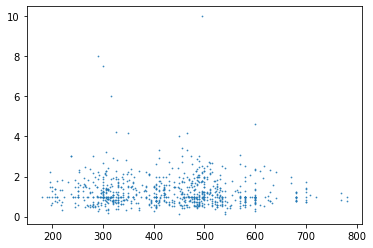

In [137]:
plt.scatter(clean_pokemon_df['base_total'],clean_pokemon_df['attack'] / clean_pokemon_df['sp_attack'] ,s = 0.6, alpha = 0.8 )

<BarContainer object of 2 artists>

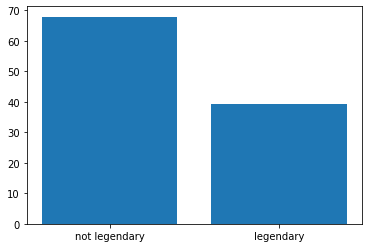

In [138]:
happiness = clean_pokemon_df.groupby('is_legendary').mean()['base_happiness']
plt.bar(['not legendary', 'legendary'],[happiness[0], happiness[1]])

<BarContainer object of 2 artists>

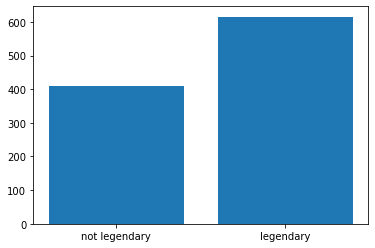

In [139]:
base_tot = clean_pokemon_df.groupby('is_legendary').mean()['base_total']
plt.bar(['not legendary', 'legendary'],[base_tot[0], base_tot[1]])

<BarContainer object of 2 artists>

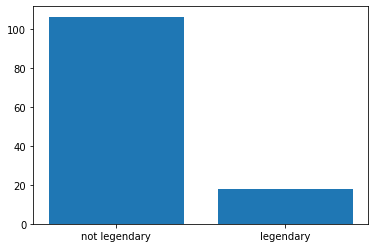

In [140]:
capt_rate = clean_pokemon_df.groupby('is_legendary').mean()['capture_rate']
plt.bar(['not legendary', 'legendary'],[capt_rate[0], capt_rate[1]])

<BarContainer object of 2 artists>

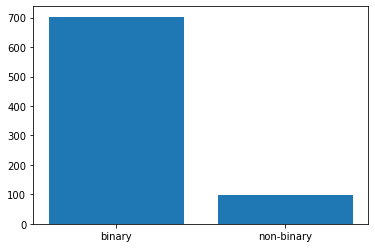

In [141]:
non_binary_counts = clean_pokemon_df.groupby('non-binary').count()['is_legendary']
ind = ['binary', 'non-binary']
val = non_binary_counts.values.tolist()
plt.bar(ind, val)

<AxesSubplot:ylabel='Frequency'>

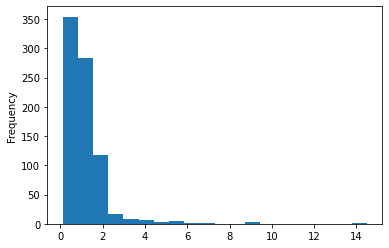

In [142]:
# histogram of height distribution
clean_pokemon_df['height_m'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

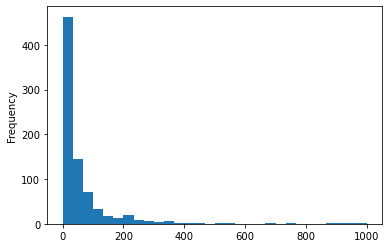

In [143]:
# histogram of weight distribution
clean_pokemon_df['weight_kg'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

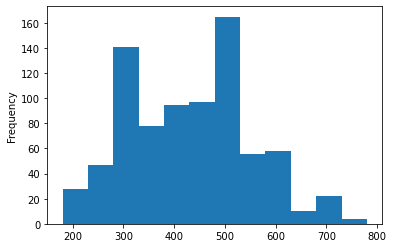

In [144]:
clean_pokemon_df['base_total'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

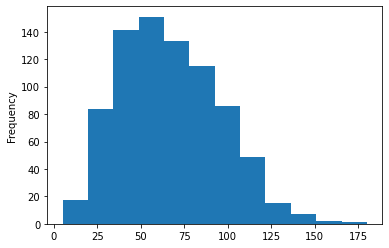

In [145]:
clean_pokemon_df['speed'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

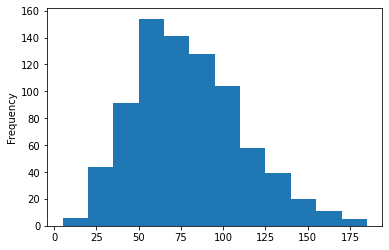

In [146]:
clean_pokemon_df['attack'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

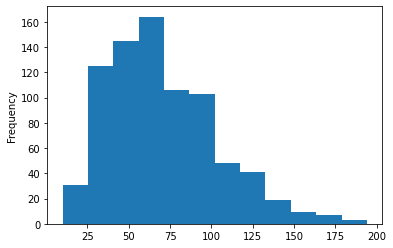

In [147]:
clean_pokemon_df['sp_attack'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

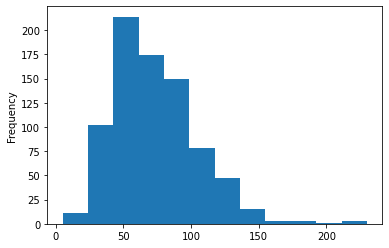

In [148]:
clean_pokemon_df['defense'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

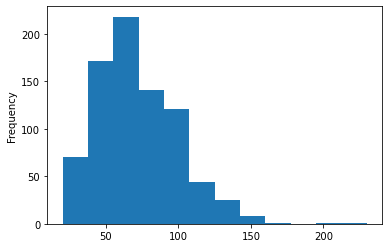

In [149]:
clean_pokemon_df['sp_defense'].plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

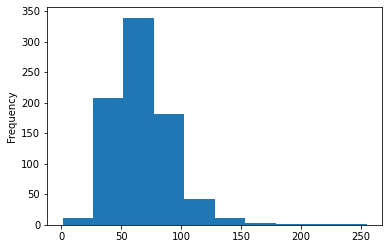

In [150]:
clean_pokemon_df['hp'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

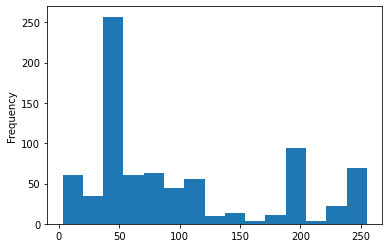

In [151]:
clean_pokemon_df['capture_rate'].plot.hist(bins=15)

In [152]:
nonBinary_df = clean_pokemon_df.loc[clean_pokemon_df['non-binary'] == 100]
nonBinary_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,95,55,45,electric,steel,6.0,1,0,0.0,100
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,120,70,70,electric,steel,60.0,1,0,0.0,100
99,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,55,55,100,electric,0,10.4,1,0,0.0,100
100,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,80,80,150,electric,0,66.6,1,0,0.0,100
119,"['Illuminate', 'Natural Cure', 'Analytic']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,...,70,55,85,water,0,34.5,1,0,0.0,100


In [153]:
binary_df = clean_pokemon_df.loc[clean_pokemon_df['non-binary'] == 0]

In [154]:
generations = clean_pokemon_df.groupby('generation').count()
generations

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,percentage_female,non-binary
generation,,,,,,,,,,,,,,,,,,,,,
1,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,88,151,151,151,151
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,54,100,100,100,100
3,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,72,135,135,135,135
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,63,107,107,107,107
5,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,79,156,156,156,156
6,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,42,72,72,72,72
7,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,57,80,80,80,80


In [155]:
generations_list = generations.index.tolist()

In [156]:
generations['name']

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: name, dtype: int64

<BarContainer object of 7 artists>

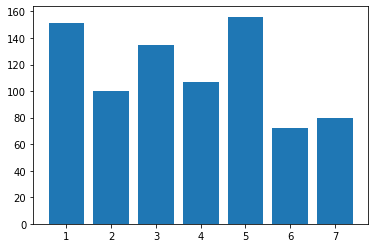

In [157]:
plt.bar(generations_list, generations['name'])

r value: -0.5709740489725594 
p value: 0.18062869821794605


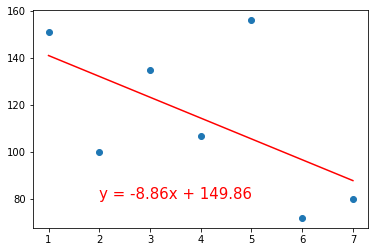

In [158]:
(slope, intercept, r_value, p_value, std_err) = linregress(generations_list, generations['name'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in generations_list]
plt.scatter(generations_list, generations['name'].values.tolist())
plt.plot(generations_list, regress_values,"r")
plt.annotate(line_eq, (2,80), fontsize=15, color="red")
print(f"r value: {r_value} \np value: {p_value}")
plt.show()

In [159]:
clean_pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'percentage_female', 'non-binary'],
      dtype='object')

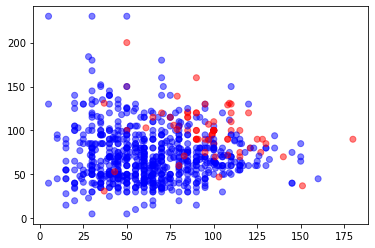

In [160]:
rarity_dict = {0:'blue', 1:'red'}
plt.scatter(clean_pokemon_df['speed'], clean_pokemon_df['defense'], c = clean_pokemon_df['is_legendary'].map(rarity_dict), alpha=0.5)

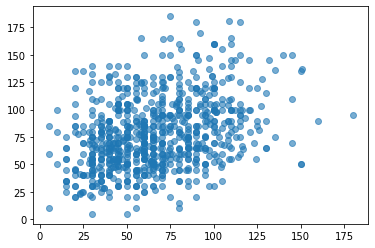

In [161]:
plt.scatter(clean_pokemon_df['speed'], clean_pokemon_df['attack'], alpha=0.6)

In [175]:
clean_pokemon_df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0


In [176]:
stat_index = [19,25,28, 33, 34, 35, 40]
stats_df = clean_pokemon_df.iloc[:, stat_index]

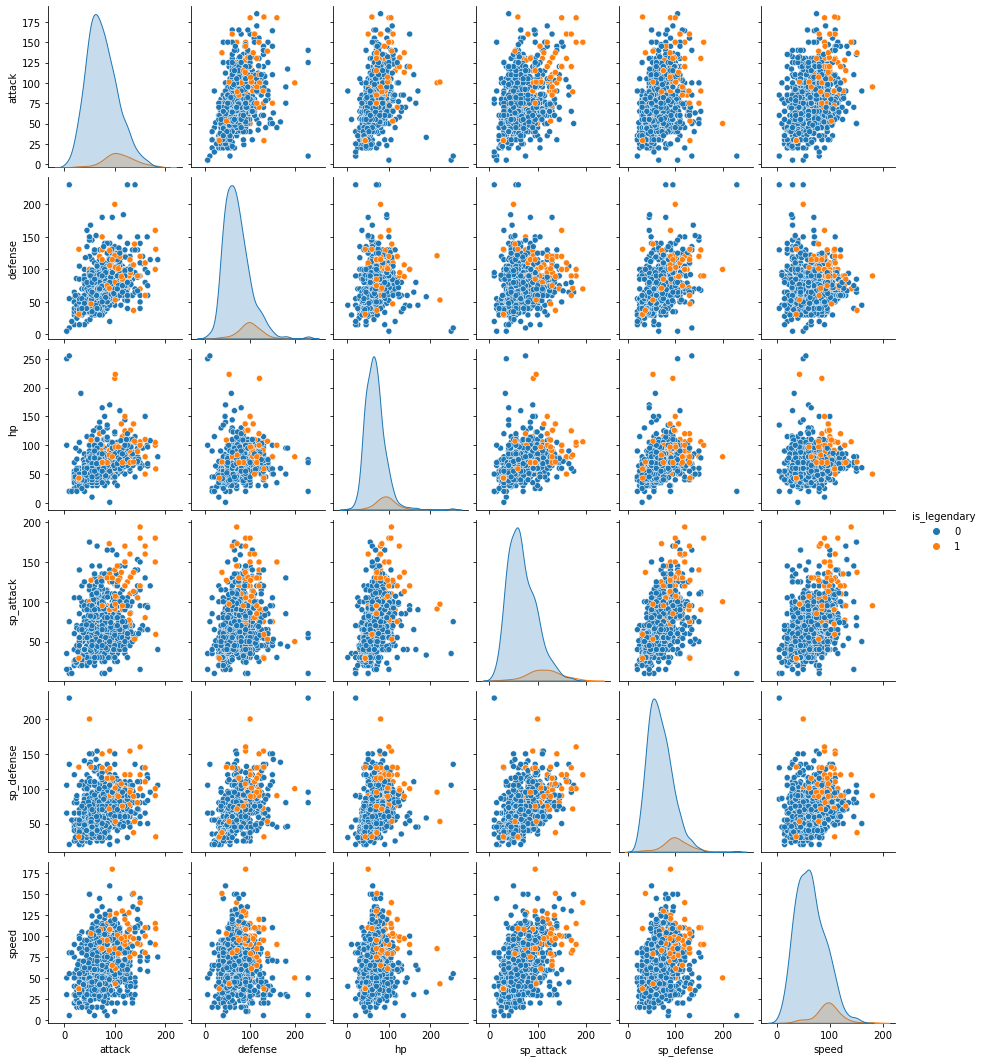

In [177]:
sns.pairplot(stats_df, aspect = 0.85, hue = 'is_legendary')

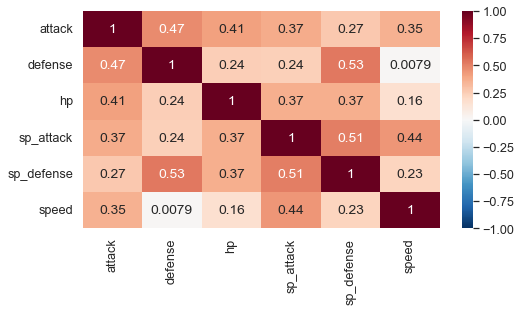

In [183]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    stats_df.iloc[:,0:6].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [184]:
# make copy of dataframe for ease of use
df = clean_pokemon_df.copy()

In [185]:
# the type attribute is difficult due the nature of it, so first visualize it
df.groupby(['type1','type2']).count().head(30)

abilities  against_bug  against_dark  against_dragon  \
type1    type2                                                            
bug      electric          4            4             4               4   
         fairy             2            2             2               2   
         fighting          3            3             3               3   
         fire              2            2             2               2   
         flying           13           13            13              13   
         ghost             1            1             1               1   
         grass             6            6             6               6   
         ground            1            1             1               1   
         poison           11           11            11              11   
         rock              3            3             3               3   
         steel             5            5             5               5   
         water             3            3             3               3   
dark     0                 1            1             1               1   
         dragon            4            4             4               4   
         fighting          2            2             2               2   
         fire              2            2             2               2   
         flying            5            5             5               5   
         ghost             1            1             1               1   
         ice               2            2             2               2   
         psychic           2            2             2               2   
         steel             2            2             2               2   
dragon   electric          1            1             1               1   
         fighting          2            2             2               2   
         fire              1            1             1               1   
         flying            4            4             4               4   
         ground            4            4             4               4   
         ice               1            1             1               1   
         psychic           2            2             2               2   
electric 0                 4            4             4               4   
         electric          1            1             1               1   

                   against_electric  against_fairy  against_fight  \
type1    type2                                                      
bug      electric                 4              4              4   
         fairy                    2              2              2   
         fighting                 3              3              3   
         fire                     2              2              2   
         flying                  13             13             13   
         ghost                    1              1              1   
         grass                    6              6              6   
         ground                   1              1              1   
         poison                  11             11             11   
         rock                     3              3              3   
         steel                    5              5              5   
         water                    3              3              3   
dark     0                        1              1              1   
         dragon                   4              4              4   
         fighting                 2              2              2   
         fire                     2              2              2   
         flying                   5              5              5   
         ghost                    1              1              1   
         ice                      2              2              2   
         psychic                  2              2              2   
         steel                    2              2              2   
dragon   electric              

In [186]:
# using fire type as an example, we can extract pokemon that are fire type
clean_pokemon_df[(clean_pokemon_df['type1'] == 'fire') | (clean_pokemon_df['type2'] == 'fire')]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,60,50,65,fire,NaN,8.5,1,0,11.9,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,80,65,80,fire,NaN,19.0,1,0,11.9,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,159,115,100,fire,flying,90.5,1,0,11.9,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,50,65,65,fire,ice,9.9,1,0,75.4,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,81,100,109,fire,ice,19.9,1,0,75.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,"['Blaze', 'Intimidate']",1.00,0.5,1.0,1.0,1.00,2.0,0.50,1.0,0.5,...,80,90,60,fire,dark,83.0,7,0,11.9,0
740,['Dancer'],0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,98,70,93,fire,flying,3.4,7,0,75.4,0
756,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,71,40,77,poison,fire,4.8,7,0,11.9,0
757,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,111,60,117,poison,fire,22.2,7,0,100.0,0


In [190]:
types = df['type1'].values.tolist()

types_list = []

for type in types:
    if type not in types_list:
        types_list.append(type)
types_list

['grass',
 'fire',
 'water',
 'bug',
 'normal',
 'poison',
 'electric',
 'ground',
 'fairy',
 'fighting',
 'psychic',
 'rock',
 'ghost',
 'ice',
 'dragon',
 'dark',
 'steel',
 'flying']

In [191]:
type_dict = dict()
for _type in types_list:
    type_dict[_type] = clean_pokemon_df[(clean_pokemon_df['type1'] == _type) | (clean_pokemon_df['type2'] == _type)]

In [192]:
type_dict

{'grass':                                            abilities  against_bug  \
 0                        ['Overgrow', 'Chlorophyll']          1.0   
 1                        ['Overgrow', 'Chlorophyll']          1.0   
 2                        ['Overgrow', 'Chlorophyll']          1.0   
 42                       ['Chlorophyll', 'Run Away']          1.0   
 43                         ['Chlorophyll', 'Stench']          1.0   
 ..                                               ...          ...   
 761        ['Leaf Guard', 'Oblivious', 'Sweet Veil']          2.0   
 762  ['Leaf Guard', 'Queenly Majesty', 'Sweet Veil']          2.0   
 780                                  ['Steelworker']          1.0   
 786                    ['Grassy Surge', 'Telepathy']          1.0   
 797                                  ['Beast Boost']          1.0   
 
      against_dark  against_dragon  against_electric  against_fairy  \
 0             1.0             1.0               0.5            0.5   
 1     

In [193]:
len(type_dict['bug'])

77

In [196]:
num_list = []
for type in types_list:
    length = len(type_dict[type])
    num_list.append(length)
num_list

[97, 64, 131, 77, 109, 64, 47, 64, 47, 53, 82, 59, 41, 38, 44, 50, 46, 98]

In [203]:
total = len(df)
pct_list = []
for num in num_list:
    pct_list.append(round(num/total*100,1))
pct_list

[12.1,
 8.0,
 16.4,
 9.6,
 13.6,
 8.0,
 5.9,
 8.0,
 5.9,
 6.6,
 10.2,
 7.4,
 5.1,
 4.7,
 5.5,
 6.2,
 5.7,
 12.2]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

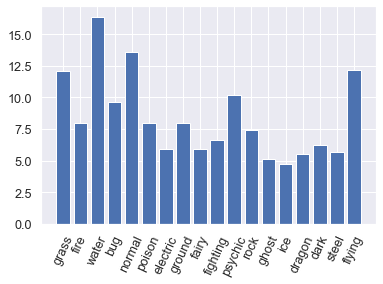

In [206]:
plt.bar(types_list, pct_list)
plt.xticks(rotation = 65)

In [207]:
clean_pokemon_df.base_total

0      318
1      405
2      625
3      309
4      405
      ... 
796    570
797    570
798    570
799    600
800    600
Name: base_total, Length: 801, dtype: int64

In [208]:
type_dict['bug']['base_total'].mean()

380.4415584415584

(300.0, 520.0)

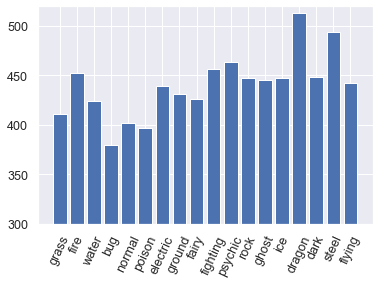

In [211]:
types_base_total = list()
for _type in types_list:
    _mean = type_dict[_type]['base_total'].mean()
    types_base_total.append(round(_mean,0))

plt.bar(types_list, types_base_total)
plt.xticks(rotation = 65)
plt.ylim(300, 520)

(40.0, 110.0)

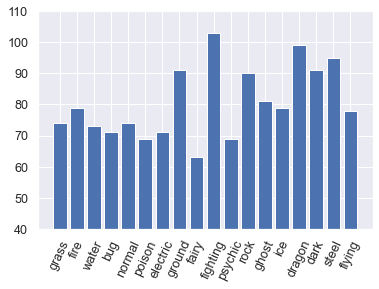

In [212]:
types_attack = list()
for _type in types_list:
    _mean = type_dict[_type]['attack'].mean()
    types_attack.append(round(_mean,0))

plt.bar(types_list, types_attack)
plt.xticks(rotation = 65)
plt.ylim(40,110)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

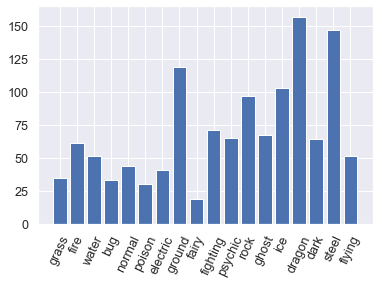

In [213]:
types_weight = list()
for _type in types_list:
    _mean = type_dict[_type]['weight_kg'].mean()
    types_weight.append(round(_mean,0))

plt.bar(types_list, types_weight)
plt.xticks(rotation = 65)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

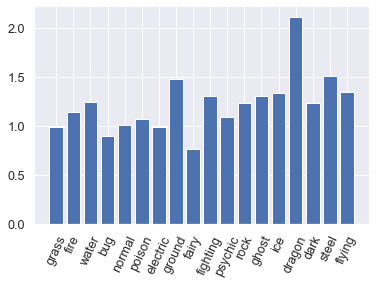

In [214]:
types_height = list()
for _type in types_list:
    _mean = type_dict[_type]['height_m'].mean()
    types_height.append(_mean)

plt.bar(types_list, types_height)
plt.xticks(rotation = 65)

In [228]:
the_list = clean_pokemon_df.abilities.values.tolist()
the_list

["['Overgrow', 'Chlorophyll']",
 "['Overgrow', 'Chlorophyll']",
 "['Overgrow', 'Chlorophyll']",
 "['Blaze', 'Solar Power']",
 "['Blaze', 'Solar Power']",
 "['Blaze', 'Solar Power']",
 "['Torrent', 'Rain Dish']",
 "['Torrent', 'Rain Dish']",
 "['Torrent', 'Rain Dish']",
 "['Shield Dust', 'Run Away']",
 "['Shed Skin']",
 "['Compoundeyes', 'Tinted Lens']",
 "['Shield Dust', 'Run Away']",
 "['Shed Skin']",
 "['Swarm', 'Sniper']",
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
 "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
 "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
 "['Keen Eye', 'Sniper']",
 "['Keen Eye', 'Sniper']",
 "['Intimidate', 'Shed Skin', 'Unnerve']",
 "['Intimidate', 'Shed Skin', 'Unnerve']",
 "['Static', 'Lightningrod']",
 "['Static', 'Lightningrod', 'Surge Surfer']",
 "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']",
 "['Sand Veil',

In [233]:
counter = 1
abilities_list = []
for l in the_list:
    abilities = l.split(',')
    print(abilities)
    for ability in abilities:
        match = re.search(pattern=r'([A-Z][a-z]+)|([A-Z][a-z]+\s[A-Z][a-z]+)', string = ability)
        if match is not None:
            print(match.group())
            if match.group() not in abilities_list:
                abilities_list.append(match.group())
#         else:
# #             print(match)
    

["['Overgrow'", " 'Chlorophyll']"]
Overgrow
Chlorophyll
["['Overgrow'", " 'Chlorophyll']"]
Overgrow
Chlorophyll
["['Overgrow'", " 'Chlorophyll']"]
Overgrow
Chlorophyll
["['Blaze'", " 'Solar Power']"]
Blaze
Solar
["['Blaze'", " 'Solar Power']"]
Blaze
Solar
["['Blaze'", " 'Solar Power']"]
Blaze
Solar
["['Torrent'", " 'Rain Dish']"]
Torrent
Rain
["['Torrent'", " 'Rain Dish']"]
Torrent
Rain
["['Torrent'", " 'Rain Dish']"]
Torrent
Rain
["['Shield Dust'", " 'Run Away']"]
Shield
Run
["['Shed Skin']"]
Shed
["['Compoundeyes'", " 'Tinted Lens']"]
Compoundeyes
Tinted
["['Shield Dust'", " 'Run Away']"]
Shield
Run
["['Shed Skin']"]
Shed
["['Swarm'", " 'Sniper']"]
Swarm
Sniper
["['Keen Eye'", " 'Tangled Feet'", " 'Big Pecks']"]
Keen
Tangled
Big
["['Keen Eye'", " 'Tangled Feet'", " 'Big Pecks']"]
Keen
Tangled
Big
["['Keen Eye'", " 'Tangled Feet'", " 'Big Pecks']"]
Keen
Tangled
Big
["['Run Away'", " 'Guts'", " 'Hustle'", " 'Gluttony'", " 'Hustle'", " 'Thick Fat']"]
Run
Guts
Hustle
Gluttony
Hustle
Thic

Unburden
Prankster
["['Limber'", " 'Unburden'", " 'Prankster']"]
Limber
Unburden
Prankster
["['Gluttony'", " 'Overgrow']"]
Gluttony
Overgrow
["['Gluttony'", " 'Overgrow']"]
Gluttony
Overgrow
["['Gluttony'", " 'Blaze']"]
Gluttony
Blaze
["['Gluttony'", " 'Blaze']"]
Gluttony
Blaze
["['Gluttony'", " 'Torrent']"]
Gluttony
Torrent
["['Gluttony'", " 'Torrent']"]
Gluttony
Torrent
["['Forewarn'", " 'Synchronize'", " 'Telepathy']"]
Forewarn
Synchronize
Telepathy
["['Forewarn'", " 'Synchronize'", " 'Telepathy']"]
Forewarn
Synchronize
Telepathy
["['Big Pecks'", " 'Super Luck'", " 'Rivalry']"]
Big
Super
Rivalry
["['Big Pecks'", " 'Super Luck'", " 'Rivalry']"]
Big
Super
Rivalry
["['Big Pecks'", " 'Super Luck'", " 'Rivalry']"]
Big
Super
Rivalry
["['Lightningrod'", " 'Motor Drive'", " 'Sap Sipper']"]
Lightningrod
Motor
Sap
["['Lightningrod'", " 'Motor Drive'", " 'Sap Sipper']"]
Lightningrod
Motor
Sap
["['Sturdy'", " 'Weak Armor'", " 'Sand Force']"]
Sturdy
Weak
Sand
["['Sturdy'", " 'Weak Armor'", " 'Sa

In [217]:
abilities_list

['Overgrow',
 'Chlorophyll',
 'Blaze',
 'Solar',
 'Torrent',
 'Rain',
 'Shield',
 'Run',
 'Shed',
 'Compoundeyes',
 'Tinted',
 'Swarm',
 'Sniper',
 'Keen',
 'Tangled',
 'Big',
 'Guts',
 'Hustle',
 'Gluttony',
 'Thick',
 'Intimidate',
 'Unnerve',
 'Static',
 'Lightningrod',
 'Surge',
 'Sand',
 'Snow',
 'Slush',
 'Poison',
 'Rivalry',
 'Sheer',
 'Cute',
 'Magic',
 'Friend',
 'Unaware',
 'Flash',
 'Drought',
 'Competitive',
 'Frisk',
 'Inner',
 'Infiltrator',
 'Stench',
 'Effect',
 'Dry',
 'Damp',
 'Wonder',
 'Arena',
 'Tangling',
 'Pickup',
 'Technician',
 'Rattled',
 'Limber',
 'Fur',
 'Cloud',
 'Swift',
 'Vital',
 'Anger',
 'Defiant',
 'Justified',
 'Water',
 'Synchronize',
 'No',
 'Steadfast',
 'Clear',
 'Liquid',
 'Rock',
 'Sturdy',
 'Magnet',
 'Galvanize',
 'Flame',
 'Oblivious',
 'Own',
 'Regenerator',
 'Analytic',
 'Early',
 'Hydration',
 'Ice',
 'Sticky',
 'Power',
 'Shell',
 'Skill',
 'Overcoat',
 'Levitate',
 'Cursed',
 'Weak',
 'Insomnia',
 'Forewarn',
 'Hyper',
 'Soundproof',

In [218]:
clean_pokemon_df.head(20)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,122,120,80,grass,poison,100.0,1,0,11.9,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,60,50,65,fire,NaN,8.5,1,0,11.9,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,...,80,65,80,fire,NaN,19.0,1,0,11.9,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,159,115,100,fire,flying,90.5,1,0,11.9,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,50,64,43,water,NaN,9.0,1,0,11.9,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,65,80,58,water,NaN,22.5,1,0,11.9,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,...,135,115,78,water,NaN,85.5,1,0,11.9,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,20,20,45,bug,NaN,2.9,1,0,50.0,0


In [219]:
df['abilities']=df['abilities'].str.strip('\"[')

In [220]:
df['abilities'] = df['abilities'].str.strip(']\"')

In [221]:
df['abilities'] = df['abilities'].str.split(',')

In [222]:
df['abilities']

0      ['Overgrow',  'Chlorophyll']
1      ['Overgrow',  'Chlorophyll']
2      ['Overgrow',  'Chlorophyll']
3         ['Blaze',  'Solar Power']
4         ['Blaze',  'Solar Power']
                   ...             
796                 ['Beast Boost']
797                 ['Beast Boost']
798                 ['Beast Boost']
799                 ['Prism Armor']
800                  ['Soul-Heart']
Name: abilities, Length: 801, dtype: object

In [223]:
df['ability1'] = None
df['ability2'] = None
df['ability3'] = None
df['ability4'] = None
df['ability5'] = None
df['ability6'] = None

In [224]:
index = 0
maximum = 0
all_list = []
for row in df.iterrows():
    abilities = row[1][0]
    if len(abilities) > maximum:
        maximum = len(abilities)
    type_counter = 1
    for ability in abilities:
        all_list.append(ability)
        if type_counter == 1:
            df.iloc[index, 40] = ability
        elif type_counter == 2:
            df.iloc[index, 41] = ability
        elif type_counter == 3:
            df.iloc[index, 42] = ability
        elif type_counter == 4:
            df.iloc[index, 43] = ability
        elif type_counter == 5:
            df.iloc[index, 44] = ability
        else:
            df.iloc[index, 45] = ability
        type_counter += 1
#         print(index, type_counter, ability)
    index += 1
print(maximum)

6


In [225]:
all_list

["'Overgrow'",
 " 'Chlorophyll'",
 "'Overgrow'",
 " 'Chlorophyll'",
 "'Overgrow'",
 " 'Chlorophyll'",
 "'Blaze'",
 " 'Solar Power'",
 "'Blaze'",
 " 'Solar Power'",
 "'Blaze'",
 " 'Solar Power'",
 "'Torrent'",
 " 'Rain Dish'",
 "'Torrent'",
 " 'Rain Dish'",
 "'Torrent'",
 " 'Rain Dish'",
 "'Shield Dust'",
 " 'Run Away'",
 "'Shed Skin'",
 "'Compoundeyes'",
 " 'Tinted Lens'",
 "'Shield Dust'",
 " 'Run Away'",
 "'Shed Skin'",
 "'Swarm'",
 " 'Sniper'",
 "'Keen Eye'",
 " 'Tangled Feet'",
 " 'Big Pecks'",
 "'Keen Eye'",
 " 'Tangled Feet'",
 " 'Big Pecks'",
 "'Keen Eye'",
 " 'Tangled Feet'",
 " 'Big Pecks'",
 "'Run Away'",
 " 'Guts'",
 " 'Hustle'",
 " 'Gluttony'",
 " 'Hustle'",
 " 'Thick Fat'",
 "'Run Away'",
 " 'Guts'",
 " 'Hustle'",
 " 'Gluttony'",
 " 'Hustle'",
 " 'Thick Fat'",
 "'Keen Eye'",
 " 'Sniper'",
 "'Keen Eye'",
 " 'Sniper'",
 "'Intimidate'",
 " 'Shed Skin'",
 " 'Unnerve'",
 "'Intimidate'",
 " 'Shed Skin'",
 " 'Unnerve'",
 "'Static'",
 " 'Lightningrod'",
 "'Static'",
 " 'Lightningr

In [ ]:
df.head(20)

In [ ]:
against = df.columns.tolist()[1:19]

In [ ]:
df['against_sum'] = 0
total = 0
total = df[against].sum()

In [ ]:
types_dict = {}
for i,j in list(enumerate(df[against].iterrows())):
#     print(sum(j[1].values.tolist()))
    types_dict[i] = sum(j[1].values.tolist())
#     print(re.match(pattern = '[+-]?([0-9]*[.])?[0-9]+', string= j[1].str))
types_dict

In [ ]:
pd.Series(types_dict)

In [ ]:
df['against_sum'] = pd.Series(types_dict)

In [ ]:
df.head()

In [ ]:
df['against_sum'].min()
df['against_sum'].loc[df['against_sum'] == df['against_sum'].min()]

In [ ]:
df.iloc[[302,706,800]].iloc[:,31:]

In [ ]:
df

In [ ]:
generation_means = df.groupby('generation').mean().iloc[:,20:]

In [ ]:
plt.plot(generation_means.index, generation_means['is_legendary'])

In [ ]:
plt.plot(generation_means.index, generation_means['base_happiness'])

In [ ]:
plt.plot(generation_means.index, generation_means['against_sum'])

In [ ]:
plt.plot(generation_means.index, generation_means['height_m'])

In [ ]:
plt.plot(generation_means.index, generation_means['weight_kg'])

In [ ]:
df.head()

In [ ]:
all_list

In [ ]:
all_abilities = []
[all_abilities.append(i.replace("'",'')) for i in [a.strip() for a in all_list]]

In [ ]:
all_abilities

In [ ]:
abilities_df = pd.DataFrame(all_abilities, columns = ['Ability'])

In [ ]:
abilities_df['Count'] = 1

In [ ]:
num_abilities = len(abilities_df)
tot_abilities = abilities_df.groupby('Ability').count().sum()

In [ ]:
abl_stat = abilities_df.groupby('Ability').count() 
abl_stat['Percent'] = round(abilities_df.groupby('Ability').count() / tot_abilities * 100,2)

In [ ]:
abl_stat

In [ ]:
abl_stat = abl_stat.sort_values(by='Count', ascending=False)

In [ ]:
abl_stat.head(10)

In [ ]:
each_ability = []
for i in all_abilities:
    if i not in each_ability:
        each_ability.append(i)
each_ability

In [ ]:
ability_dict = {}
for a in each_ability:
    d = df[(df['ability1'].str.strip('\'') == a) | (df['ability2'].str.strip('\'') == a) | (df['ability3'].str.strip('\'') == a) | (df['ability4'].str.strip('\'') == a) | (df['ability5'].str.strip('\'') == a) | (df['ability6'].str.strip('\'') == a)]
    n = len(d)
    ability_dict[a] = n

In [ ]:
ability_dict

In [ ]:
df.against_sum.max()

In [ ]:
df.loc[df['against_sum'] == 26.0][['type1','type2']]

In [ ]:
df.columns

In [ ]:
df['capture_rate'].iloc[773] = '30'

In [ ]:
df['capture_rate'] = pd.to_numeric(df['capture_rate'])

In [ ]:
df.groupby('generation').mean()['capture_rate'].plot()

In [ ]:
dragon = df[(df['type1'] == 'dragon') | (df['type2'] == 'dragon')]
dark = df[(df['type1'] == 'dark') | (df['type2'] == 'dark')]
bug = df[(df['type1'] == 'bug') | (df['type2'] == 'bug')]
electric = df[(df['type1'] == 'electric') | (df['type2'] == 'electric')]
fairy = df[(df['type1'] == 'fairy') | (df['type2'] == 'fairy')]
fighting = df[(df['type1'] == 'fighting') | (df['type2'] == 'fighting')]
fire = df[(df['type1'] == 'fire') | (df['type2'] == 'fire')]
flying = df[(df['type1'] == 'flying') | (df['type2'] == 'flying')]
ghost = df[(df['type1'] == 'ghost') | (df['type2'] == 'ghost')]
grass = df[(df['type1'] == 'grass') | (df['type2'] == 'grass')]
ground = df[(df['type1'] == 'ground') | (df['type2'] == 'ground')]
ice = df[(df['type1'] == 'ice') | (df['type2'] == 'ice')]
normal = df[(df['type1'] == 'normal') | (df['type2'] == 'normal')]
poison= df[(df['type1'] == 'poison') | (df['type2'] == 'poison')]
psychic = df[(df['type1'] == 'psychic') | (df['type2'] == 'psychic')]
rock = df[(df['type1'] == 'rock') | (df['type2'] == 'rock')]
steel = df[(df['type1'] == 'steel') | (df['type2'] == 'steel')]
water = df[(df['type1'] == 'water') | (df['type2'] == 'water')]

In [ ]:
cpt_rt = [dragon['capture_rate'].mean(),
dark['capture_rate'].mean(),
bug['capture_rate'].mean(),
electric['capture_rate'].mean(),
fairy['capture_rate'].mean(),
fighting['capture_rate'].mean(),
fire['capture_rate'].mean(),
flying['capture_rate'].mean(),
ghost['capture_rate'].mean(),
grass['capture_rate'].mean(),
ground['capture_rate'].mean(),
ice['capture_rate'].mean(),
normal['capture_rate'].mean(),
poison['capture_rate'].mean(),
psychic['capture_rate'].mean(),
rock['capture_rate'].mean(),
steel['capture_rate'].mean(),
water['capture_rate'].mean()]

In [ ]:
cpt_rt

In [ ]:
for r in cpt_rt:
    index = cpt_rt.index(r)
    cpt_rt[index] = int(round(r,0))
cpt_rt

In [ ]:
len(cpt_rt)


In [ ]:
reordered_types = types
reordered_types[0] = 'dragon'
reordered_types[2] = 'bug'
plt.bar(reordered_types, cpt_rt)
plt.xticks(rotation = 60)
# plt.ylim(60,130)

In [ ]:
len(reordered_types)

In [ ]:
base_t = [dragon['base_total'].mean(),
dark['base_total'].mean(),
bug['base_total'].mean(),
electric['base_total'].mean(),
fairy['base_total'].mean(),
fighting['base_total'].mean(),
fire['base_total'].mean(),
flying['base_total'].mean(),
ghost['base_total'].mean(),
grass['base_total'].mean(),
ground['base_total'].mean(),
ice['base_total'].mean(),
normal['base_total'].mean(),
poison['base_total'].mean(),
psychic['base_total'].mean(),
rock['base_total'].mean(),
steel['base_total'].mean(),
water['base_total'].mean()]

In [ ]:
for r in base_t:
    index = base_t.index(r)
    base_t[index] = int(round(r,0))
base_t

In [ ]:
plt.bar(reordered_types,base_t)
plt.xticks(rotation = 60)
plt.ylim(350,530)

In [ ]:
df_list = [
    dragon,
    dark,
    bug,
    electric,
    fairy,
    fighting,
    fire,
    flying,
    ghost,
    grass,
    ground,
    ice,
    normal,
    poison,
    psychic,
    rock,
    steel,
    water 
]

len(df_list)

In [ ]:
base_h = [dragon['base_happiness'].mean(),
dark['base_happiness'].mean(),
bug['base_happiness'].mean(),
electric['base_happiness'].mean(),
fairy['base_happiness'].mean(),
fighting['base_happiness'].mean(),
fire['base_happiness'].mean(),
flying['base_happiness'].mean(),
ghost['base_happiness'].mean(),
grass['base_happiness'].mean(),
ground['base_happiness'].mean(),
ice['base_happiness'].mean(),
normal['base_happiness'].mean(),
poison['base_happiness'].mean(),
psychic['base_happiness'].mean(),
rock['base_happiness'].mean(),
steel['base_happiness'].mean(),
water['base_happiness'].mean()]


for r in base_h:
    index = base_h.index(r)
    base_h[index] = int(round(r,0))


plt.bar(reordered_types,base_h)
plt.xticks(rotation = 60)
plt.ylim(40,75)
plt.ylabel('Happiness')

In [ ]:
base_s = [dragon['speed'].mean(),
dark['speed'].mean(),
bug['speed'].mean(),
electric['speed'].mean(),
fairy['speed'].mean(),
fighting['speed'].mean(),
fire['speed'].mean(),
flying['speed'].mean(),
ghost['speed'].mean(),
grass['speed'].mean(),
ground['speed'].mean(),
ice['speed'].mean(),
normal['speed'].mean(),
poison['speed'].mean(),
psychic['speed'].mean(),
rock['speed'].mean(),
steel['speed'].mean(),
water['speed'].mean()]


for r in base_s:
    index = base_s.index(r)
    base_s[index] = int(round(r,0))


plt.bar(reordered_types,base_s)
plt.xticks(rotation = 60)
plt.ylim(50,85)
plt.ylabel('Speed')

In [ ]:
dragon.base_total.plot.hist(bins=8)

In [ ]:
df.base_total.plot.hist(bins=10)

In [ ]:
df.attack.plot.hist(bins=10)

In [ ]:
df.defense.plot.hist(bins=10)

In [ ]:
df.capture_rate.plot.hist(bins=10)

In [ ]:
df.weight_kg.plot.hist(bins=100)

In [ ]:
dragon.base_happiness.plot.hist(bins=5)

In [ ]:
df.height_m.plot.hist(bins=100)

In [ ]:
df['weight_kg'].max()

In [ ]:
df.loc[df['weight_kg'] == 999.9]['name']

In [ ]:
df['base_happiness'].max()

In [ ]:
df.loc[df['base_happiness'] == 140]['name']

In [ ]:
df.attack.max()

In [ ]:
df[df.attack == 185]['name']

In [ ]:

df[df.speed == (df.speed.max())]['name']

In [ ]:
df[df.defense == (df.defense.max())]['name']

In [ ]:
df[df.base_total == df.base_total.min()]['name']

In [ ]:
normal.base_total.plot.hist(bins=12)

In [ ]:
df

In [ ]:
all_abilities

In [ ]:
len(each_ability)

In [ ]:
dragon

In [ ]:
dragon.columns

In [ ]:
dragon.describe().iloc[:, 20:]

In [ ]:
dragon.corr().iloc[:, 20:]

In [ ]:
df.corr().iloc[18:, 18:]

In [ ]:
df.groupby('generation').mean()['experience_growth'].plot()

In [ ]:
df.groupby('generation').mean()['speed'].plot()

In [ ]:
df.groupby('generation').mean()['base_total'].plot()

In [ ]:
df.head()

In [ ]:
df.columns.tolist()

In [ ]:
df['ability1'] = df['ability1'].str.strip("'")
df['ability2'] = df['ability2'].str.strip("'").str.strip(' ').str.strip("'")
df['ability3'] = df['ability3'].str.strip("'").str.strip(' ').str.strip("'")
df['ability4'] = df['ability4'].str.strip("'").str.strip(' ').str.strip("'")
df['ability5'] = df['ability5'].str.strip("'").str.strip(' ').str.strip("'")
df['ability6'] = df['ability6'].str.strip("'").str.strip(' ').str.strip("'")

In [ ]:
df.head()

In [ ]:
df['ability2'][0]

In [ ]:
df['ability2'].values.tolist()